In [1]:
# Get data from:
# https://files.catbox.moe/1cypdf.zip
# https://files.catbox.moe/bzbcdw.zip

# STL files:
# https://files.catbox.moe/mply23.zip
# https://files.catbox.moe/3glm31.ipynb  

import numpy as np

from keras.layers import UpSampling2D
# import matplotlib.pyplot as plt
import time
import pickle
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, Add
from tensorflow.keras.layers import Conv2DTranspose, DepthwiseConv2D, GlobalAveragePooling2D, Input
from tensorflow.keras.callbacks import TensorBoard
%matplotlib inline


# Commonly used modules

import os
import sys
import cv2

# Images, plots, display, and visualization
import matplotlib.pyplot as plt

print(tf.__version__)

# import matplotlib.pyplot as plt
from PIL import Image

# instances = []
# PreOptimizationImages = []

# # Load the images from the directory
# count = 0
# for filename in os.listdir(unzip_path):
#     count += 1
#     filepath = os.path.join(unzip_path, filename)
#     print("filepath: ", filepath)
#     image = Image.open(filepath).convert('L')  # Open image and convert to grayscale
#     PreOptimizationImages.append(np.array(image))

# print("Saved images:", len(PreOptimizationImages))
# print(type(PreOptimizationImages[0]))
# plt.imshow(PreOptimizationImages[0], cmap='gray')  # Display grayscale image


c:\ProgramData\miniconda3\envs\Mark\lib\site-packages\tensorflow\python\framework\dtypes.py:585: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.object,


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
# Set the paths to the image folders
pre_optimization_folder = './preProjectionSeq'
post_optimization_folder = './ImageSeq'

# Make sure gpu doesn't run out of memory

gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Function to load grayscale images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith('.png'):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
    return images

# Load pre-optimization grayscale images
pre_optimization_images = load_images_from_folder(pre_optimization_folder)

# Load post-optimization grayscale images
post_optimization_images = load_images_from_folder(post_optimization_folder)

# Convert image lists to numpy arrays
pre_optimization_images = np.array(pre_optimization_images)
post_optimization_images = np.array(post_optimization_images)

# Normalize the image data
pre_optimization_images = pre_optimization_images / 255.0
post_optimization_images = post_optimization_images / 255.0


# Print the shape of the loaded image arrays
print("Pre-optimization images shape:", pre_optimization_images.shape)
print("Post-optimization images shape:", post_optimization_images.shape)

Pre-optimization images shape: (18000, 128, 128)
Post-optimization images shape: (18000, 128, 128)


<module 'tensorflow._api.v2.version' from 'c:\\Users\\Mark\\anaconda3\\envs\\ModifiedCALenv\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>
First pre-optimization image:


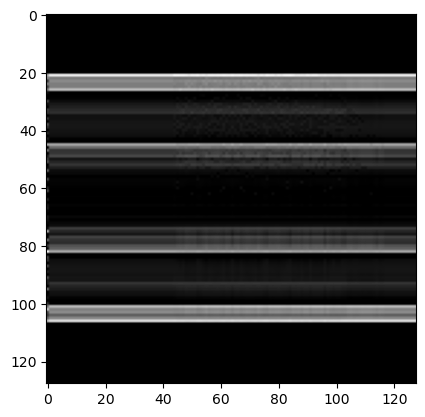

First post-optimization image:


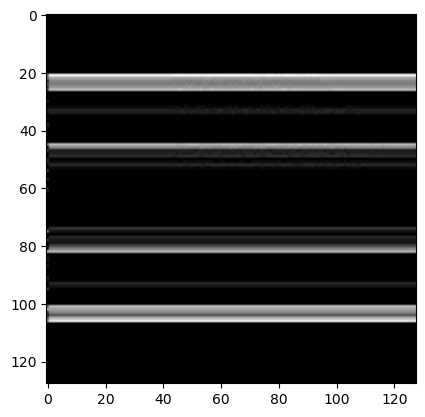

In [ ]:
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#    raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))
print(tf.version)

print("First pre-optimization image:")
plt.imshow(pre_optimization_images[0], cmap='gray')
plt.show()

print("First post-optimization image:")
plt.imshow(post_optimization_images[0], cmap='gray')
plt.show()


In [ ]:
# #Build the model
# dropout = 0.2
# input = tf.keras.Input(shape=x_train[0].shape)
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate


# model based off of https://www.youtube.com/watch?v=GAYJ81M58y8&t=910s
def unet(input_shape):
    # Contracting path
    inputs = Input(input_shape)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    # pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    # conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    # # pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    # # conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    # # conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    # # # Expanding path
    # # up6 = UpSampling2D(size=(2, 2))(conv5)
    # # up6 = Conv2D(512, 2, activation='relu', padding='same')(up6)
    # # merge6 = concatenate([conv4, up6], axis=3)
    # # conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
    # # conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    # up7 = UpSampling2D(size=(2, 2))(conv6)
    # up7 = Conv2D(256, 2, activation='relu', padding='same')(up7)
    # merge7 = concatenate([conv3, up7], axis=3)
    # conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    # conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = UpSampling2D(size=(2, 2))(conv3) # up8 = UpSampling2D(size=(2, 2))(conv7)
    up8 = Conv2D(128, 2, activation='relu', padding='same')(up8)
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = UpSampling2D(size=(2, 2))(conv8)
    up9 = Conv2D(64, 2, activation='relu', padding='same')(up9)
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    conv9 = Conv2D(2, 3, activation='relu', padding='same')(conv9)

    # Output layer
    output = Conv2D(1, 1, activation='sigmoid')(conv9) #linear function

    # Create the model
    model = Model(inputs=inputs, outputs=output)

    return model

# print(PreOptimizationImages[0].shape)
# for layer in range(PreOptimizationImages[0].shape[2]):
#     layer_array = PreOptimizationImages[0][:,:,layer]
#     non_zero_count = np.count_nonzero(layer_array)
#     print("Non-zero count for layer", layer+1, ":", non_zero_count)



# input_shape = (256, 256, 1)  # Shape of the input images
input_shape = pre_optimization_images[0].shape + (1,)  # Add the channel dimension
print("Input shape:", input_shape)
model = unet(input_shape)
model.summary()


Input shape: (128, 128, 1)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 128, 128, 64  640         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_25 (Conv2D)             (None, 128, 128, 64  36928       ['conv2d_24[0][0]']              
                                )                                

In [ ]:


if tf.config.list_physical_devices('GPU'):
    print("GPU is available!")
else:
    print("GPU is not available.")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # Set to the GPU device index you want to use

print(tf.config.list_physical_devices('GPU'))

from sklearn.model_selection import train_test_split

# pre_optimization_images = pre_optimization_images[0:200]
# post_optimization_images = post_optimization_images[0:200]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    pre_optimization_images, post_optimization_images, test_size=0.2, random_state=42
)


# Prepare the data for training
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))
x_train = x_train / 255.0  # Normalize pixel values
x_test = x_test / 255.0

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# Save the model    
model.save("model.h5")
tf.saved_model.save(model, "model_savedmodel")



# ask alvin about CUDA and Nvidia driver
#try linear for output layer
# GELU for inner layers?
# tune learning rate (how to decrease learning rate)
# run for more epochs
# save the best validation loss model (early stop)
# tensorboard (for larger number fo epochs)

GPU is not available.
[]


Epoch 1/10
450/450 [==============================] - 4030s 9s/step - loss: 0.1768 - val_loss: 0.1384
Epoch 2/10
450/450 [==============================] - 3794s 8s/step - loss: 0.1111 - val_loss: 0.0884
Epoch 3/10
450/450 [==============================] - 8462s 19s/step - loss: 0.0728 - val_loss: 0.0599
Epoch 4/10
450/450 [==============================] - 4153s 9s/step - loss: 0.0510 - val_loss: 0.0435
Epoch 5/10
450/450 [==============================] - 3845s 9s/step - loss: 0.0382 - val_loss: 0.0337
Epoch 6/10
450/450 [==============================] - 21075s 47s/step - loss: 0.0305 - val_loss: 0.0277
Epoch 7/10
450/450 [==============================] - 36728s 82s/step - loss: 0.0257 - val_loss: 0.0238
Epoch 8/10
450/450 [==============================] - 3995s 9s/step - loss: 0.0226 - val_loss: 0.0213
Epoch 9/10
450/450 [==============================] - 3985s 9s/step - loss: 0.0205 - val_loss: 0.0197
Epoch 10/10
450/450 [==============================] - 3800s 8s/step - loss: 

INFO:tensorflow:Assets written to: model_savedmodel\assets


INFO:tensorflow:Assets written to: model_savedmodel\assets


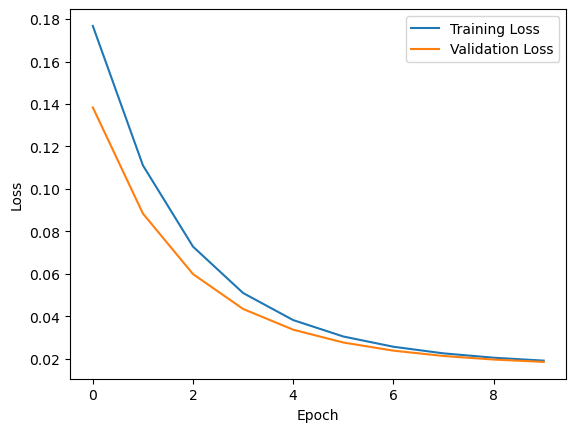

In [ ]:
import tensorflow as tf

# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 1s 590ms/step


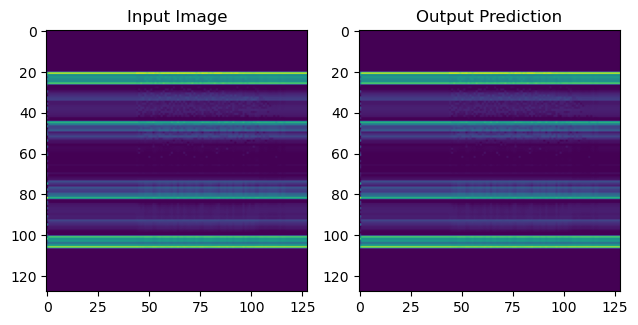

1/1 [==============================] - 0s 253ms/step


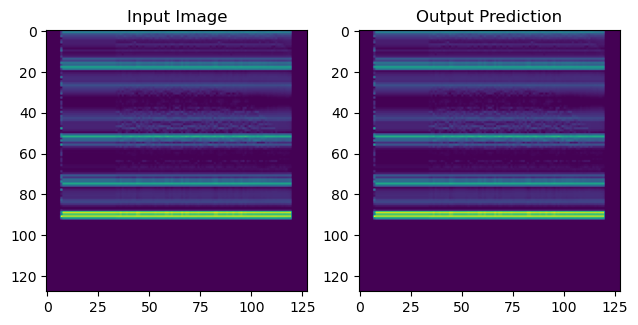

1/1 [==============================] - 0s 248ms/step


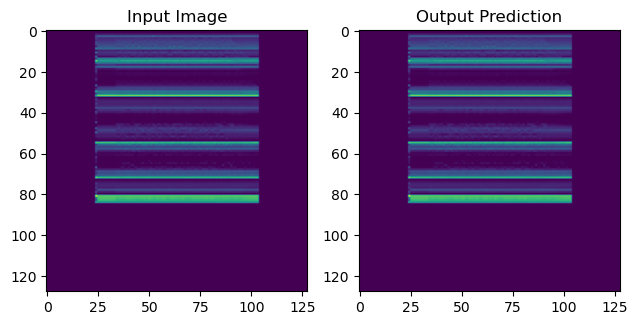

1/1 [==============================] - 0s 278ms/step


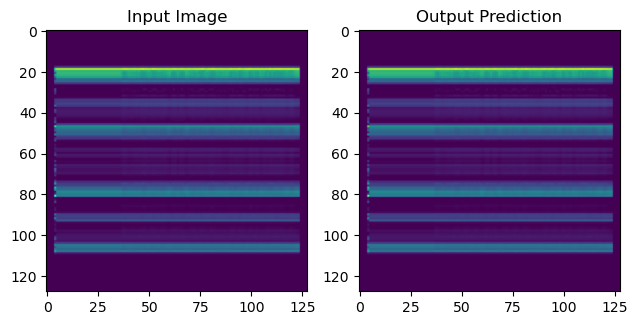

1/1 [==============================] - 0s 266ms/step


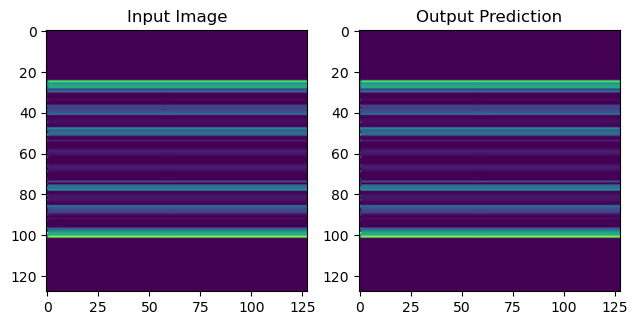

1/1 [==============================] - 0s 334ms/step


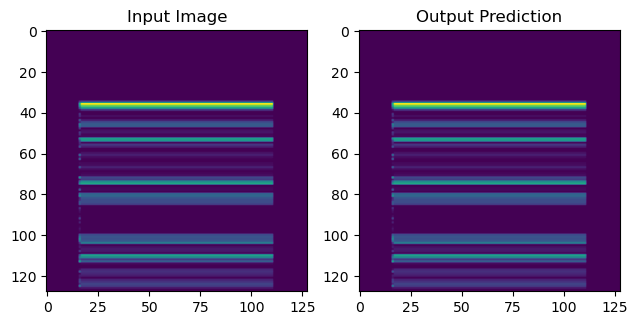

1/1 [==============================] - 0s 261ms/step


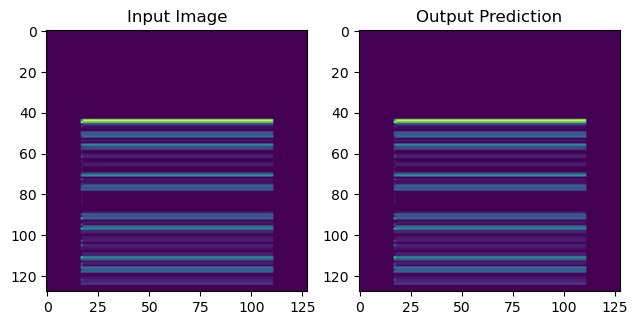

1/1 [==============================] - 0s 268ms/step


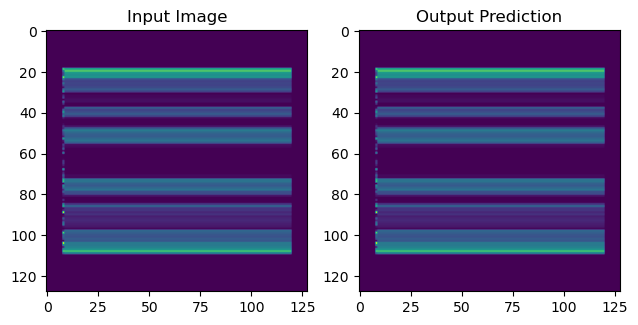

1/1 [==============================] - 0s 281ms/step


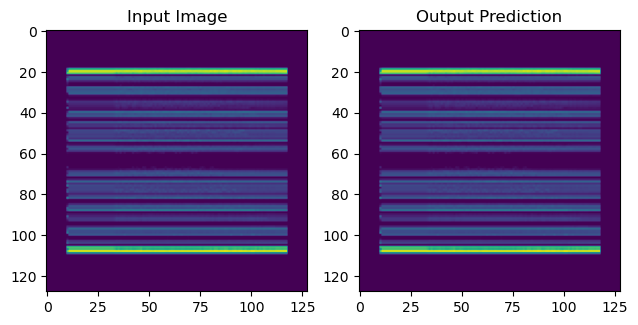

1/1 [==============================] - 0s 259ms/step


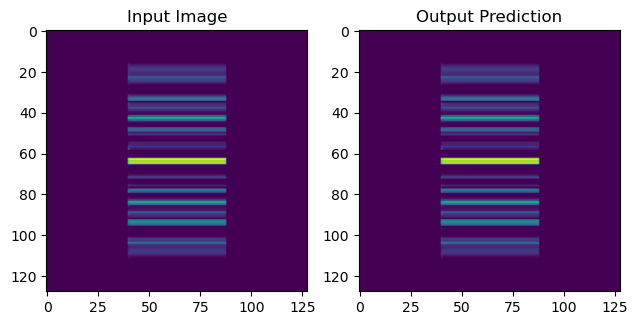

1/1 [==============================] - 0s 257ms/step


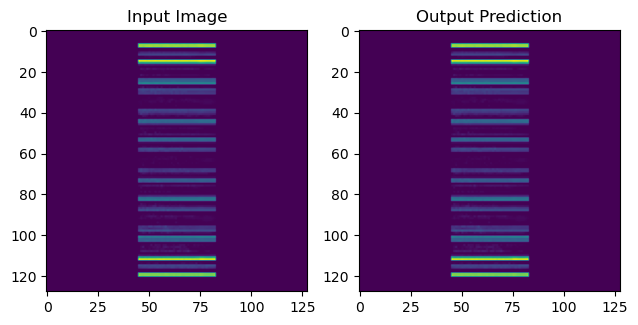

1/1 [==============================] - 0s 218ms/step


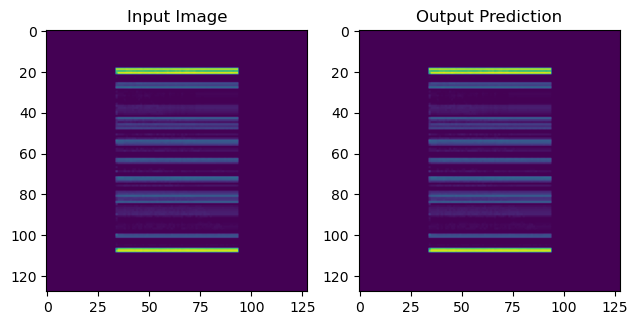

1/1 [==============================] - 0s 241ms/step


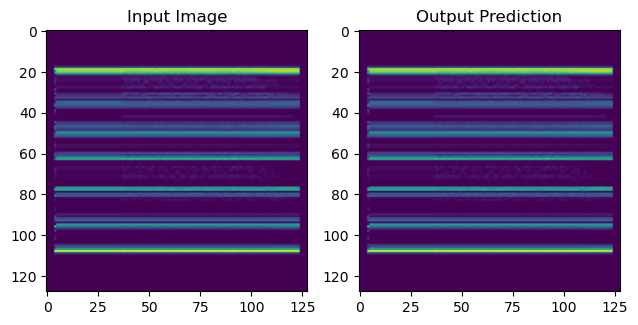

1/1 [==============================] - 0s 257ms/step


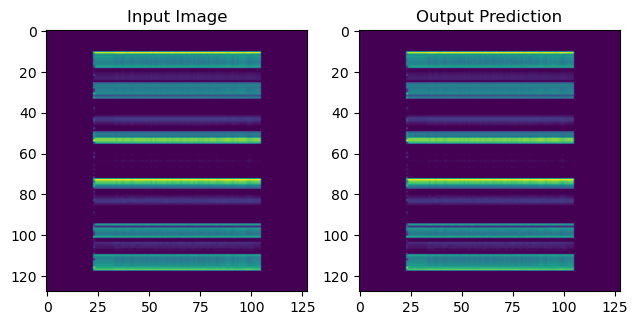

1/1 [==============================] - 0s 269ms/step


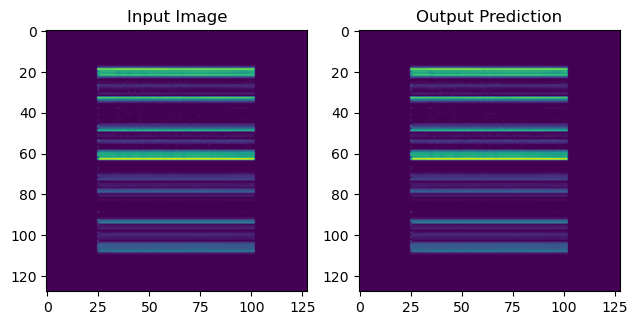

1/1 [==============================] - 0s 240ms/step


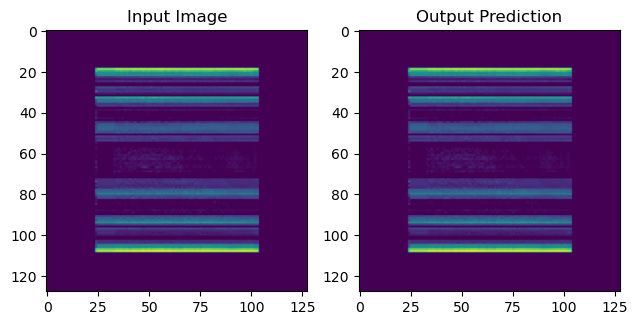

1/1 [==============================] - 0s 250ms/step


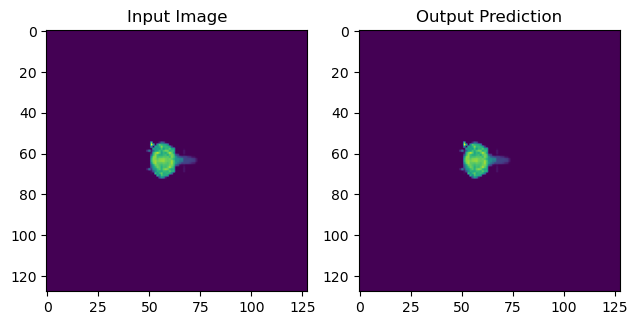

1/1 [==============================] - 0s 242ms/step


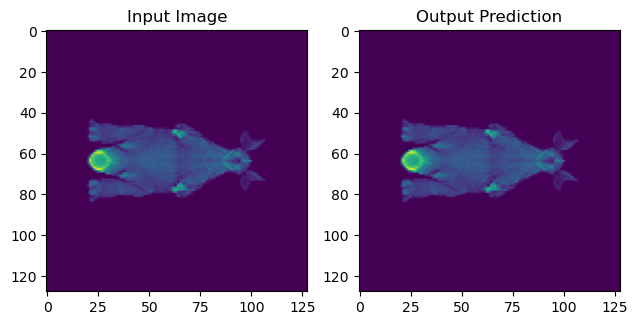

1/1 [==============================] - 0s 254ms/step


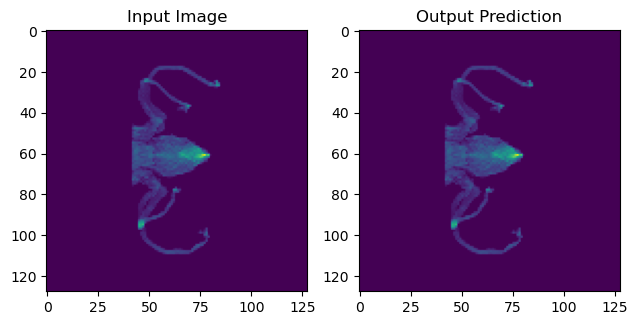

1/1 [==============================] - 0s 258ms/step


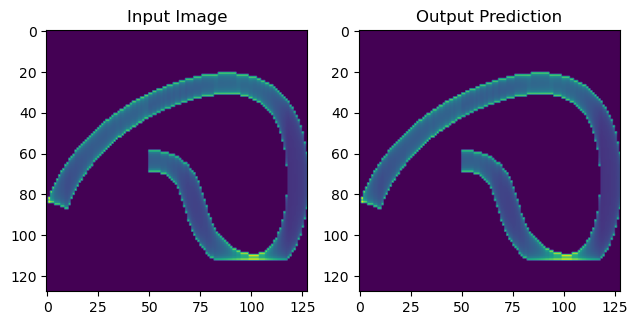

1/1 [==============================] - 0s 243ms/step


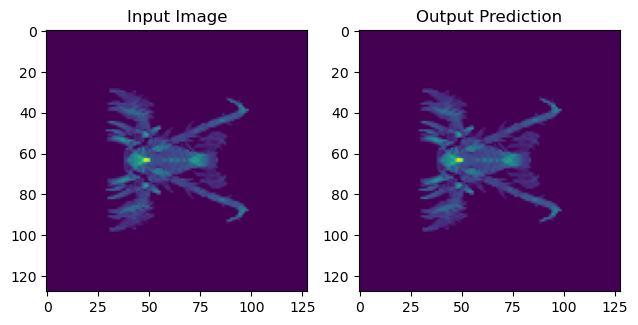

1/1 [==============================] - 0s 268ms/step


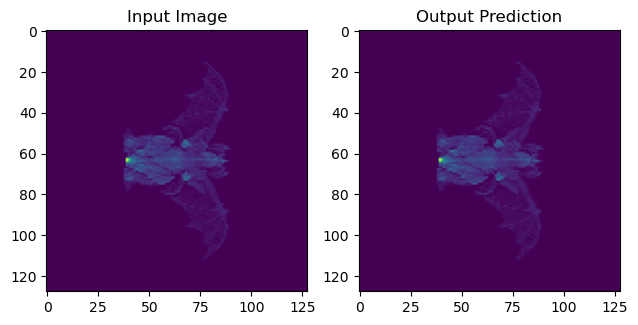

1/1 [==============================] - 0s 284ms/step


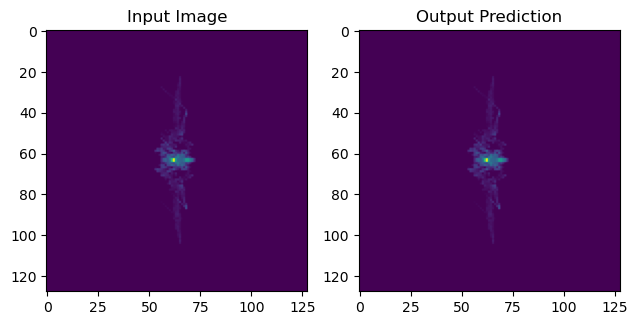

1/1 [==============================] - 0s 216ms/step


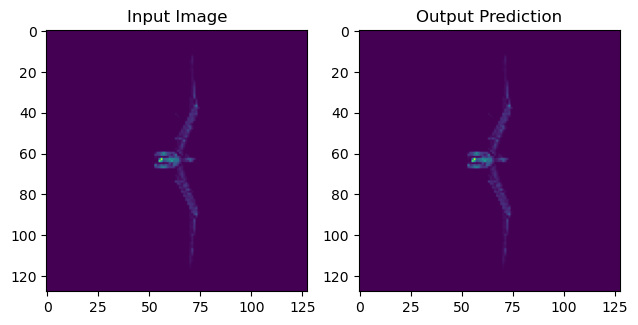

1/1 [==============================] - 0s 272ms/step


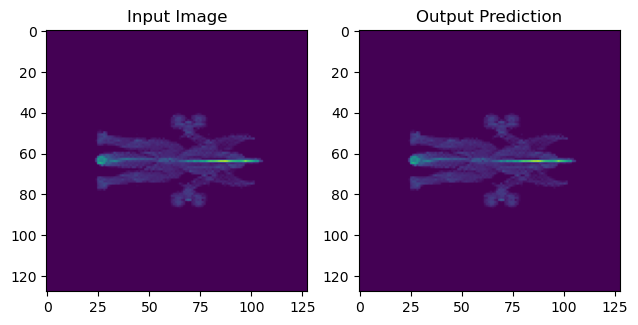

1/1 [==============================] - 0s 261ms/step


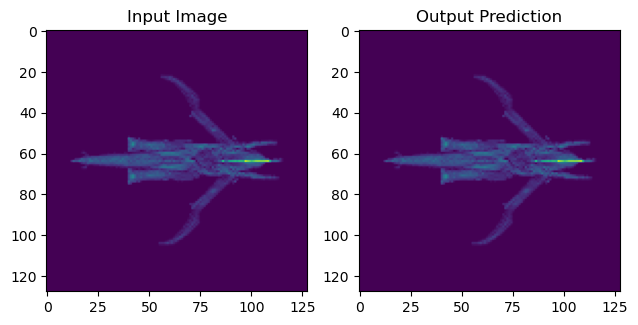

1/1 [==============================] - 0s 216ms/step


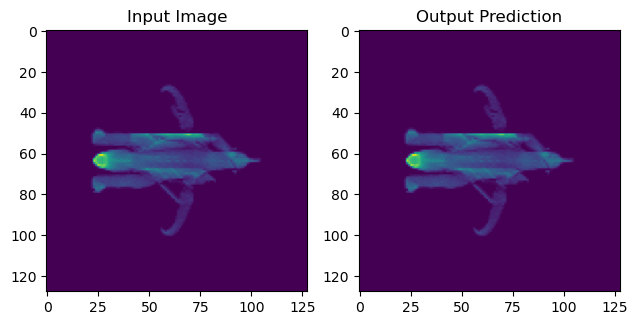

1/1 [==============================] - 0s 253ms/step


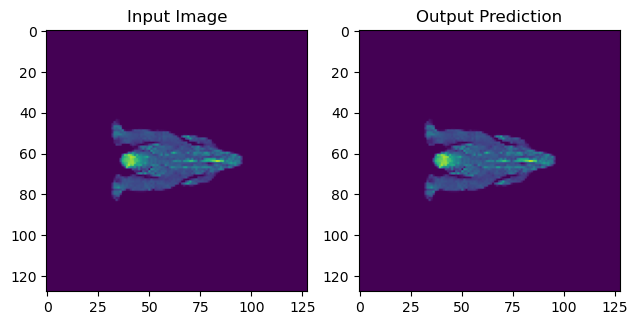

1/1 [==============================] - 0s 370ms/step


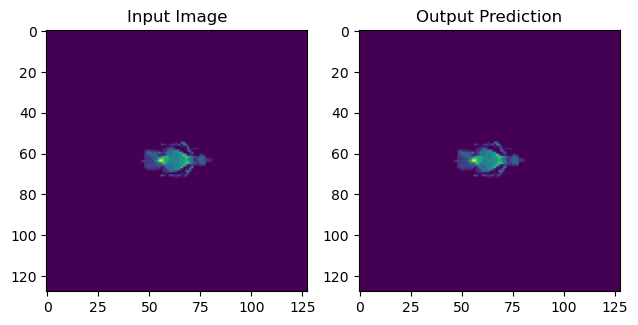

1/1 [==============================] - 0s 240ms/step


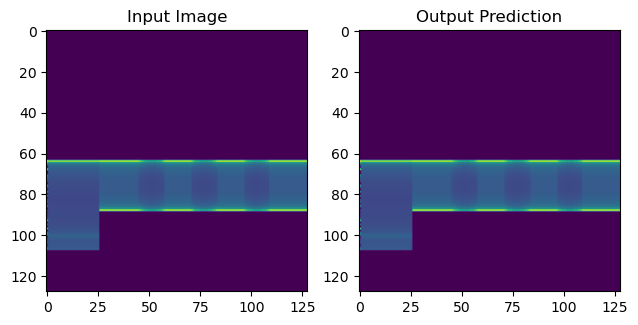

1/1 [==============================] - 0s 250ms/step


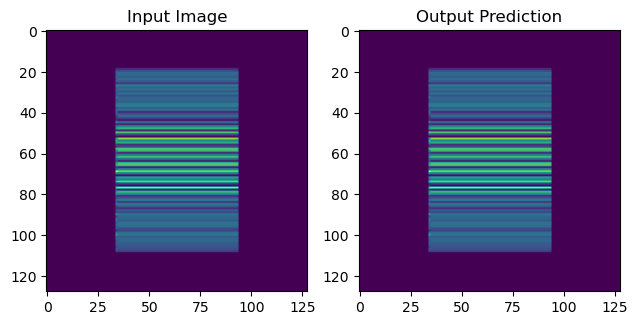

1/1 [==============================] - 0s 247ms/step


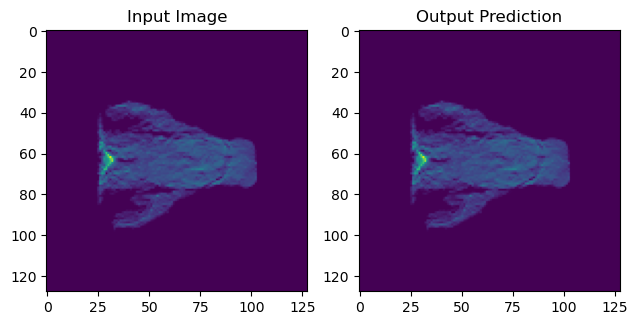

1/1 [==============================] - 0s 331ms/step


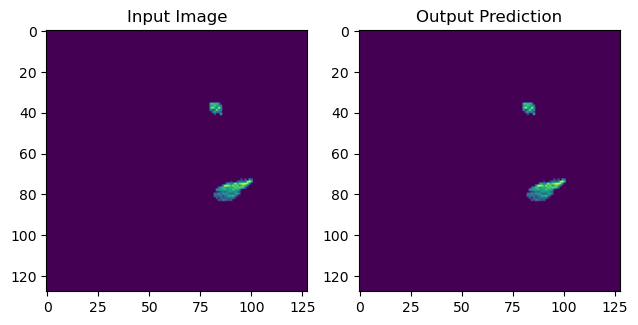

1/1 [==============================] - 0s 221ms/step


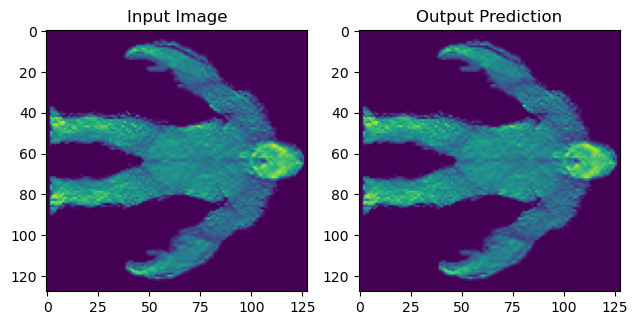

1/1 [==============================] - 0s 218ms/step


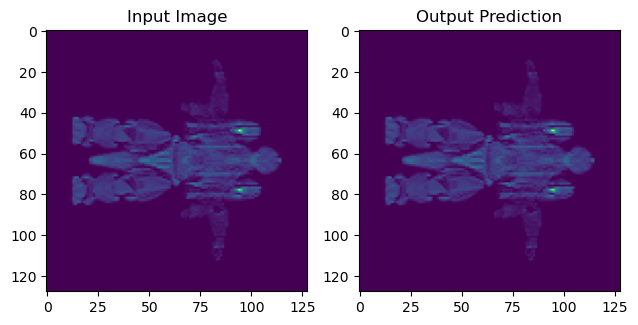

1/1 [==============================] - 0s 233ms/step


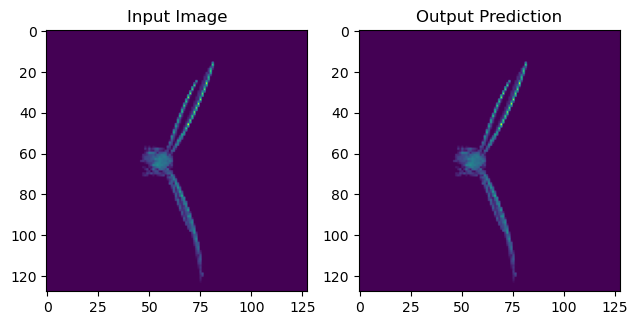

1/1 [==============================] - 0s 227ms/step


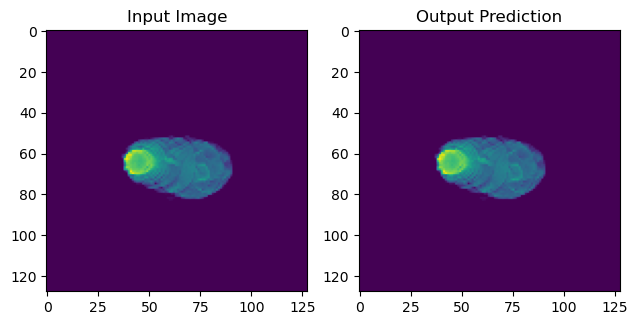

1/1 [==============================] - 0s 278ms/step


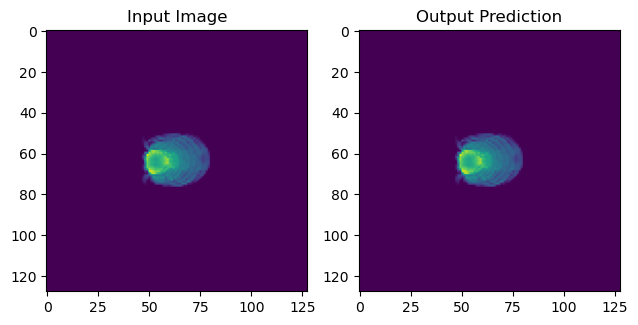

1/1 [==============================] - 0s 239ms/step


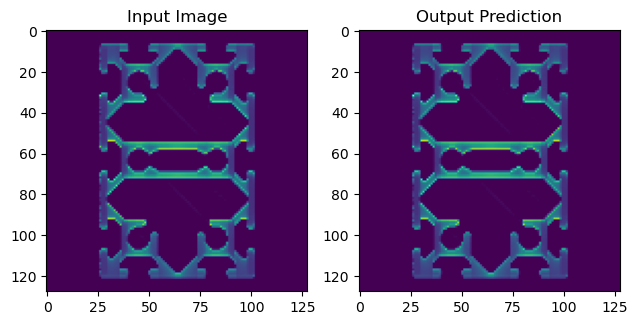

1/1 [==============================] - 0s 308ms/step


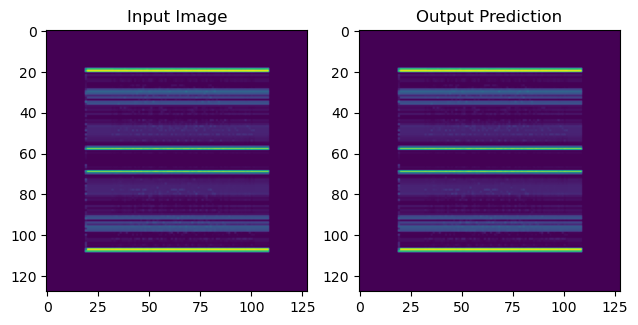

1/1 [==============================] - 0s 302ms/step


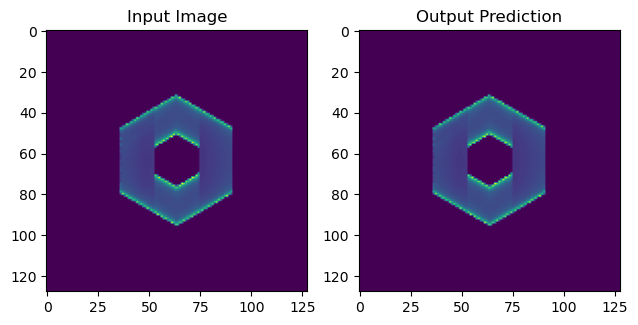

1/1 [==============================] - 0s 243ms/step


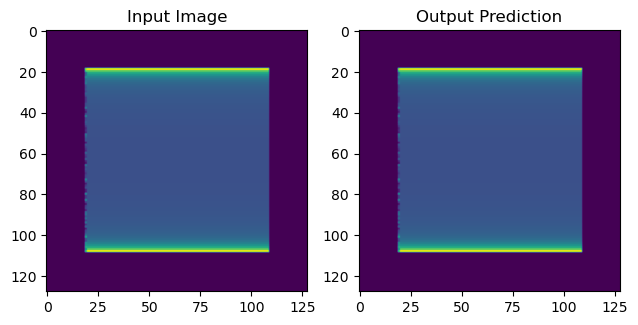

1/1 [==============================] - 0s 264ms/step


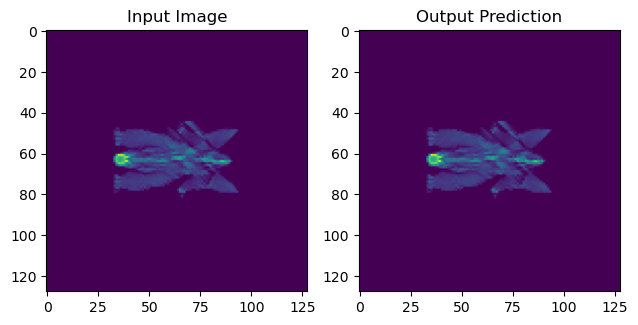

1/1 [==============================] - 0s 268ms/step


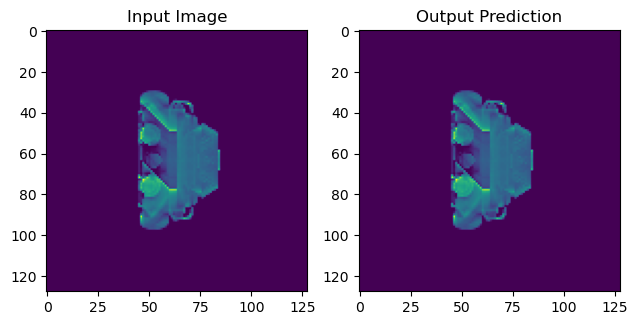

1/1 [==============================] - 0s 260ms/step


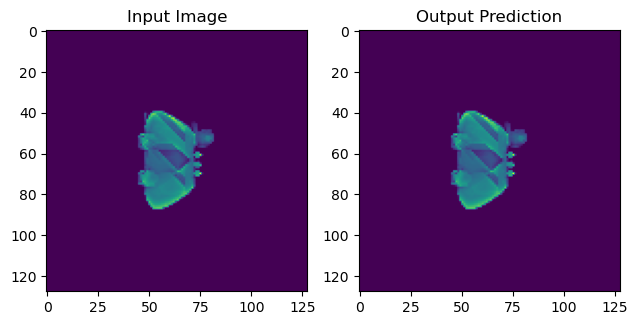

1/1 [==============================] - 0s 193ms/step


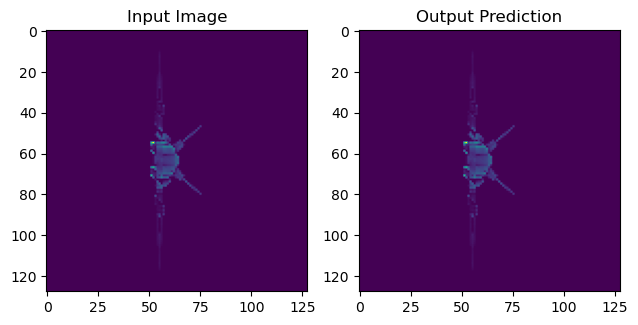

1/1 [==============================] - 0s 205ms/step


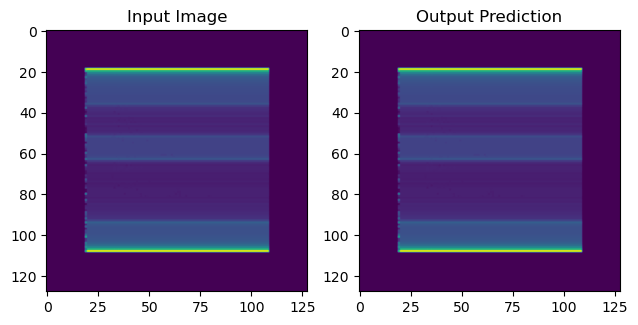

1/1 [==============================] - 0s 244ms/step


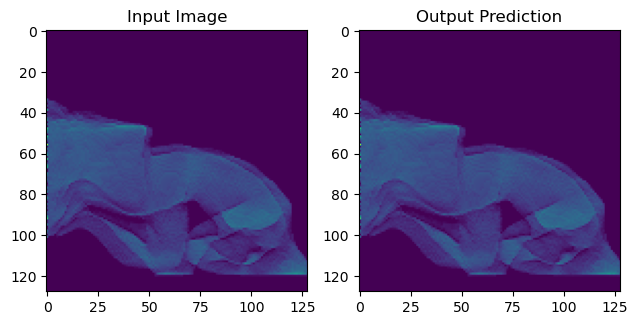

1/1 [==============================] - 0s 264ms/step


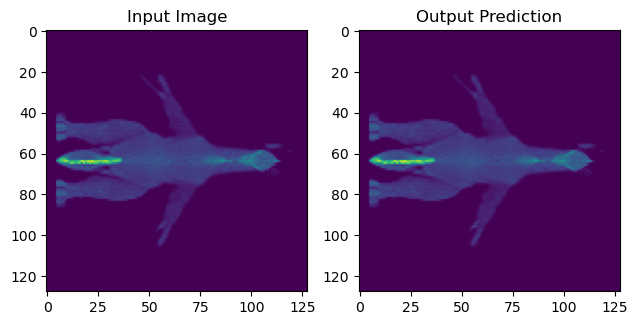

1/1 [==============================] - 0s 229ms/step


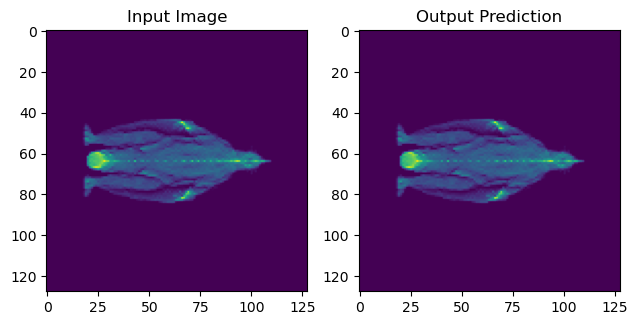

IndexError: index 18000 is out of bounds for axis 0 with size 18000

In [ ]:

# Load the model
model = tf.keras.models.load_model("model.h5")

def Pass_img_through_model(prediction_image_index):
    # Get the input data point
    input_data = pre_optimization_images[prediction_image_index]

    # Get the input data point
    input_data = pre_optimization_images[prediction_image_index]

    # Reshape the input data
    input_data = np.expand_dims(input_data, axis=-1)  # Add channel dimension

    # Perform inference
    prediction = model.predict(np.expand_dims(input_data, axis=0))

    # Convert prediction array to 1D numpy array
    prediction = prediction[0]

    # Display input and output
    fig, (ax1, ax2) = plt.subplots(1, 2)

    # Display input image
    ax1.imshow(input_data)
    ax1.set_title('Input Image')

    # Display output image
    ax2.imshow(input_data)
    ax2.set_title('Output Prediction')

    plt.tight_layout()
    plt.show()

for i in range(0, 20000, 360):
    Pass_img_through_model(i)